#### Question 1.5.1 : Causal inference in Statistics : A primer.

In [1]:
import numpy as np
import pandas as pd 

# Generate random data for U_x, U_y, and U_z
# Assuming these are normally distributed random variables with mean 0 and standard deviation 1
# These are exogeenous variables in the context of a causal graph
U_x = np.random.normal(loc=0, scale=1, size=1000)
U_y = np.random.normal(loc=0, scale=1, size=1000)
U_z = np.random.normal(loc=0, scale=1, size=1000)

X = U_x
Y = X/3 + U_y
Z = Y/16 + U_z

In [2]:
!pip install networkx matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ------------------------------ --------- 1.6/2.0 MB 27.9 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 7.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -------------------------------- ------- 6.6/8.1 MB 33.6 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 27.8 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 15.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


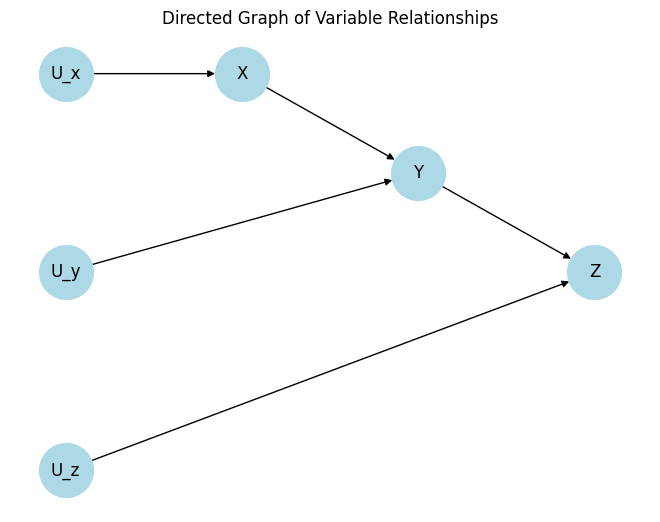

In [4]:
# Creating a directed graph to represent the causal relationships
# between U_x, U_y, U_z, X, Y, and Z
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_nodes_from(['U_x', 'U_y', 'U_z', 'X', 'Y', 'Z'])

# Add directed edges based on relationships
G.add_edge('U_x', 'X')
G.add_edge('X', 'Y')
G.add_edge('U_y', 'Y')
G.add_edge('Y', 'Z')
G.add_edge('U_z', 'Z')

# Draw the graph
pos = {
    'U_x': (0, 2),
    'X': (1, 2),
    'U_y': (0, 1),
    'Y': (2, 1.5),
    'U_z': (0, 0),
    'Z': (3, 1)
}
nx.draw(G, pos, with_labels=True, arrows=True, node_color='lightblue', node_size=1500, font_size=12)
plt.title("Directed Graph of Variable Relationships")
plt.show()

In [10]:
# Lets say we need to find the expected value of Z given Y = 3
def expected_value_Z_given_Y(y_value):
    # Calculate the expected value of Z given Y = y_value
    
    E_Y = y_value
    E_U_z = np.mean(U_z)
    print(f"Expected value of Y: {E_Y}")
    print(f"Expected value of U_z: {E_U_z}")
    
    return E_Y/16 + E_U_z

# Example usage
y_value = 3 
expected_Z = expected_value_Z_given_Y(y_value)
print(f"Expected value of Z given Y = {y_value}: {expected_Z}")

Expected value of Y: 3
Expected value of U_z: -0.007971352147049802
Expected value of Z given Y = 3: 0.1795286478529502


In [11]:
# Lets say we need to find the expected value of Z given X = 3
def expected_value_Z_given_X(x_value):
    # Calculate the expected value of Z given Y = y_value
    
    E_X = x_value
    E_U_z = np.mean(U_z)
    E_U_y = np.mean(U_y)
    
    return E_X/48 + E_U_y/16 + E_U_z

# Example usage
x_value = 3 
expected_Z = expected_value_Z_given_X(x_value)
print(f"Expected value of Z given X = {x_value}: {expected_Z}")

Expected value of Z given X = 3: 0.05753548582795229


In [17]:
!pip install scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   -------------------- ------------------- 4.5/8.7 MB 22.3 MB/s eta 0:00:01
   --------------------------------- ------ 7.3/8.7 MB 18.9 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 16.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.4 MB ? eta -:--:--
   -- ------------------------------------- 2.6/38.4 MB 13.7 MB/s eta 0:00:03
   --- ------------------------------------ 3.4/38.4 MB 8.0 MB/s eta 0:00:05
   ---- ----------------------------------- 3.9/38.4 MB 6.7 MB/s eta 0:00:06
   ---- ----------------------------------- 4.5/38.4 MB 5.6 MB/s eta 0:00:07
   ----- ---------------------------------- 5.5/38.4 MB 5.2 MB/s eta 0:00:07
   ------ --------------------------------- 6.6/38.4 MB 5.2 MB/s eta 0:00:07
   ------- -------------------------------- 7.6/38.4 MB 5.3 MB/s eta 0:00:06
   --------- ------------------------------ 8.9/38.4 MB 5.3 MB/s eta 0:00:06
   ----------


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
# I need to find a regression model that predicts Y based on X and Z values 
# define a linear regression model for Y based on X and Z
# Prepare feature matrix with X and Z
X_features = np.column_stack((X, Z))

# Add intercept column
X_design = np.column_stack((np.ones(X_features.shape[0]), X_features))

# Calculate coefficients using normal equation
beta = np.linalg.inv(X_design.T @ X_design) @ X_design.T @ Y

print("Intercept:", beta[0])
print("Coefficient for X:", beta[1])
print("Coefficient for Z:", beta[2])


Intercept: 0.048737232693691304
Coefficient for X: 0.3358740852262966
Coefficient for Z: 0.1056355347350018


In [19]:
beta[1]*1 + beta[2]*3 + beta[0]

np.float64(0.7015179221249933)

In [21]:
# Prepare feature matrix with X and Z (no intercept column)
X_features = np.column_stack((X, Z))

# Calculate coefficients without intercept using normal equation
beta_no_intercept = np.linalg.inv(X_features.T @ X_features) @ X_features.T @ Y

print("Coefficient for X (no intercept):", beta_no_intercept[0])
print("Coefficient for Z (no intercept):", beta_no_intercept[1])

Coefficient for X (no intercept): 0.33482938085989056
Coefficient for Z (no intercept): 0.10540868054842266


In [22]:
beta_no_intercept[0] * 1 + beta_no_intercept[1] * 3

np.float64(0.6510554225051586)

In [20]:
400/771

0.5188067444876784

### Question ...